In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('thread_csv_all.csv')

In [5]:
df.shape

(54057, 70)

Class 0: 44157
Class 1: 9900
Proportion: 4.46 : 1


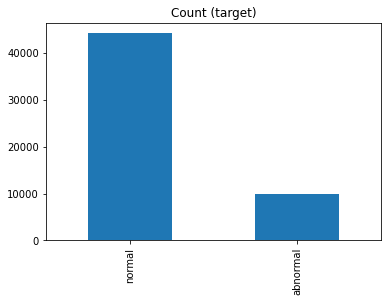

In [6]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [7]:
df_test = df.iloc[:,5:df.shape[1]]
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)
df_test = df_test.astype({"target": int})

In [8]:
df_test.head()

,target,spect_mean,spect_min,spect_max,spect_std,mel_spect_mean,mel_spect_min,mel_spect_max,mel_spect_std,chroma_mean,...,zero_crossing_rate_max,zero_crossing_rate_std,d_harmonic_mean,d_harmonic_min,d_harmonic_max,d_harmonic_std,d_percussive_mean,d_percussive_min,d_percussive_max,d_percussive_std
0,1,0.107133,1.922508e-11,8.000317,0.286640,0.027701,1.037248e-16,2.211059,0.114145,0.725547,...,0.125488,0.015289,0.059173,1.413419e-12,7.861723,0.217199,0.047960,1.447360e-11,2.427006,0.102428
1,1,0.091550,1.239772e-10,11.825641,0.306949,0.030819,4.313560e-17,6.186258,0.179811,0.669924,...,0.122559,0.022209,0.051675,1.856747e-13,11.707416,0.261016,0.039876,7.817087e-11,2.639281,0.086876
2,1,0.114412,2.546376e-10,8.061798,0.300529,0.030709,9.986857e-17,2.741547,0.122470,0.757677,...,0.107422,0.013853,0.061442,5.859085e-13,7.840732,0.220184,0.052971,7.954731e-11,2.856351,0.114448
3,1,0.108589,6.224236e-11,7.651740,0.277428,0.026152,8.320724e-17,2.086277,0.111460,0.568654,...,0.125488,0.012602,0.064017,1.636899e-13,7.523073,0.240022,0.044573,2.057399e-11,1.847202,0.077006
4,1,0.107343,9.855214e-12,7.804570,0.287012,0.027893,7.353611e-17,2.580597,0.117691,0.559896,...,0.119141,0.010417,0.064301,1.400486e-13,7.756195,0.248836,0.043042,4.824911e-12,2.022621,0.079337


In [9]:
y = df_test['target']
df_test = df_test.drop('target', 1)

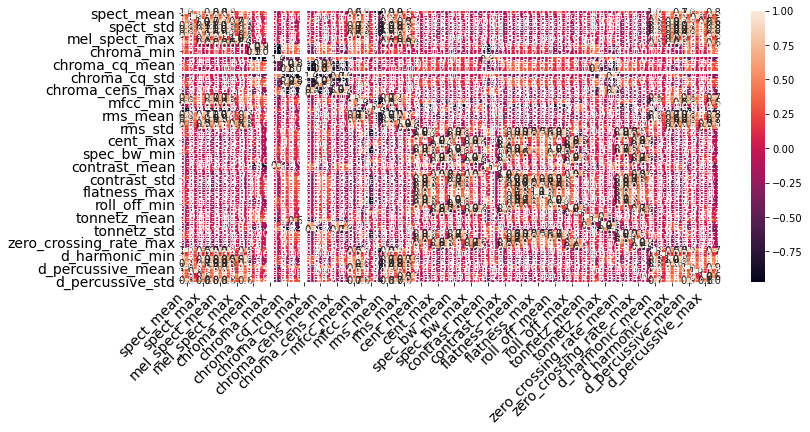

In [10]:
#correlation matrix
plt.figure(figsize=(12,5))
heatmap = sn.heatmap(df_test.corr(), annot=True, fmt=".1f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.show()

In [ ]:
# Correlation matrix
df_test.corr().style.background_gradient(cmap="coolwarm")

In [133]:
df_test.shape

(54057, 14)

In [376]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.2,
    random_state=100
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(43245, 64) (43245,)
(10812, 64) (10812,)


In [1]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='majority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, Y_train)

NameError: name 'X_train' is not defined

Class 0: 35333
Class 1: 35333
Proportion: 1.0 : 1


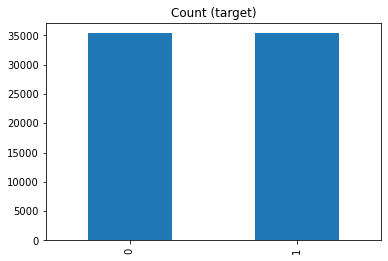

In [136]:
target_count = y_over.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [307]:
# Split dataframe into random train and test subsets

X_train_valid, X_test_valid, Y_train_valid, Y_test_valid = train_test_split(
    X_train,
    Y_train,
    test_size=0.2,
    random_state=100
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(43245, 14) (43245,)
(10812, 14) (10812,)


In [308]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.2,
    random_state=100
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(43245, 14) (43245,)
(10812, 14) (10812,)


In [309]:
Y_train.values.sum()

7912

In [229]:
class_weight = dict({0:1,1:4})

In [364]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 50, n_estimators = 500,
                                    )

In [342]:
from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100, random_state=50)

In [2]:
random_forest.fit(X_train, Y_train)

NameError: name 'random_forest' is not defined

In [280]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
from sklearn.model_selection import cross_val_score
# 10-Fold Cross validation
print(np.mean(cross_val_score(random_forest, X_train, Y_train, cv=cv)))

0.8600994334605158


In [ ]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(df_test,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df_test.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(70,'Score'))  # print 10 best features

In [ ]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(14,14))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(random_forest.feature_importances_,X_train.columns,'RANDOM FOREST')

In [344]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

86.89

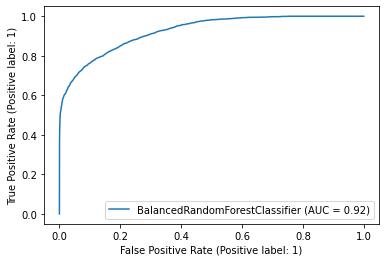

In [345]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

roc = plot_roc_curve(random_forest, X_test, Y_test)

In [346]:
y_pred = random_forest.predict(X_test)

In [347]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix

In [348]:
print(f1_score(Y_test, y_pred, average="macro"))
print(precision_score(Y_test, y_pred, average="macro"))
print(recall_score(Y_test, y_pred, average="macro")) 

0.801017821255719
0.7799086579251786
0.8322220266294047


In [349]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8824
           1       0.61      0.77      0.68      1988

    accuracy                           0.87     10812
   macro avg       0.78      0.83      0.80     10812
weighted avg       0.88      0.87      0.87     10812



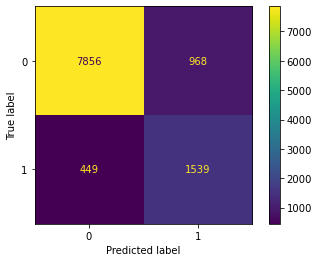

In [350]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest, X_test, Y_test);